In [1]:
from ip_analysis_tool.util.graph_getter import get_graph_by_date
from ip_analysis_tool.util.date_util import get_date_object
from ip_analysis_tool.accessibility_within_hops import accessibility_within_hops
from ip_analysis_tool.trend_identification import poisson_fit, gaussian_fit
from ip_analysis_tool.visualize.chart import visualize_chart_add_dual_line

In [2]:
# Helper chi-squared function
import numpy as np
def chi_2(data, observed, expected):
    obs = data[observed].values
    exp = data[expected].values
    return np.sum((obs - exp)**2 / exp)

Poisson lambda: 9.951075239095584, Poisson std: 3.1545324913678705, Poisson chi: 1284.9140284005487
Gaussian lambda: 9.951075239095584, Gaussian std: 3.172520263810932, Gaussian chi: 2118.598797988732


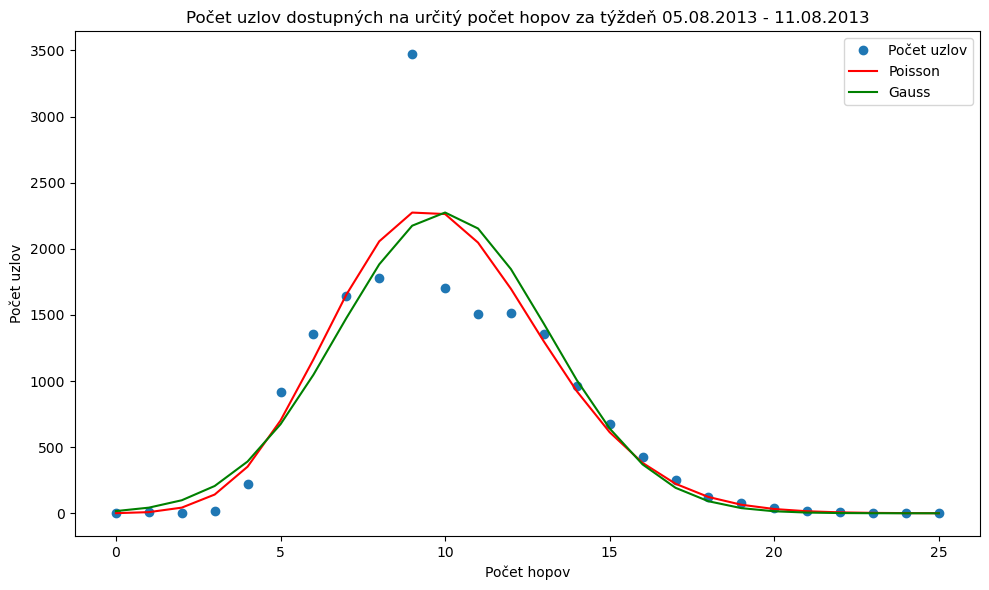

    distance  count  percentage  cumulative_count  cumulative_percentage  \
0          0      1    0.005528                 1               0.005528   
1          1      7    0.038698                 8               0.044226   
2          2      4    0.022113                12               0.066339   
3          3     18    0.099508                30               0.165847   
4          4    222    1.227265               252               1.393112   
5          5    914    5.052795              1166               6.445906   
6          6   1356    7.496268              2522              13.942175   
7          7   1640    9.066283              4162              23.008458   
8          8   1780    9.840234              5942              32.848693   
9          9   3471   19.188457              9413              52.037150   
10        10   1705    9.425618             11118              61.462767   
11        11   1508    8.336558             12626              69.799326   
12        12

In [3]:

data = accessibility_within_hops(get_graph_by_date(get_date_object("2013-08-05")))
data, poisson_lambda, poisson_std = poisson_fit(data, x_characteristic="distance", y_characteristic="count")
data, gauss_lambda, gauss_std = gaussian_fit(data, x_characteristic="distance",y_characteristic="count")
data.to_csv("scratchpad/accessibility_within_hops_2013-08-05.csv", index=False)
print("Poisson lambda: " + str(poisson_lambda) + ", Poisson std: " + str(poisson_std) + ", Poisson chi: " + str(chi_2(data, "count", "poisson_fit")))
print("Gaussian lambda: " + str(gauss_lambda) + ", Gaussian std: " + str(gauss_std) + ", Gaussian chi: " + str(chi_2(data, "count", "gaussian_fit")))

visualize_chart_add_dual_line(
    data=data,
    x_characteristic="distance",
    y_characteristic="count",
    y_line_characteristic="poisson_fit",
    y_2_line_characteristic="gaussian_fit",
    title="Počet uzlov dostupných na určitý počet hopov za týždeň 05.08.2013 - 11.08.2013",
    x_label="Počet hopov",
    y_label="Počet uzlov",
    y_line_label="Poisson",
    y_2_line_label="Gauss"
)
print(data)

Poisson lambda: 6.948894490320662, Poisson std: 2.63607558509248, Poisson chi: 114540.9009230613
Gaussian lambda: 6.948894490320662, Gaussian std: 1.5796446270434894, Gaussian chi: 557910510.57641


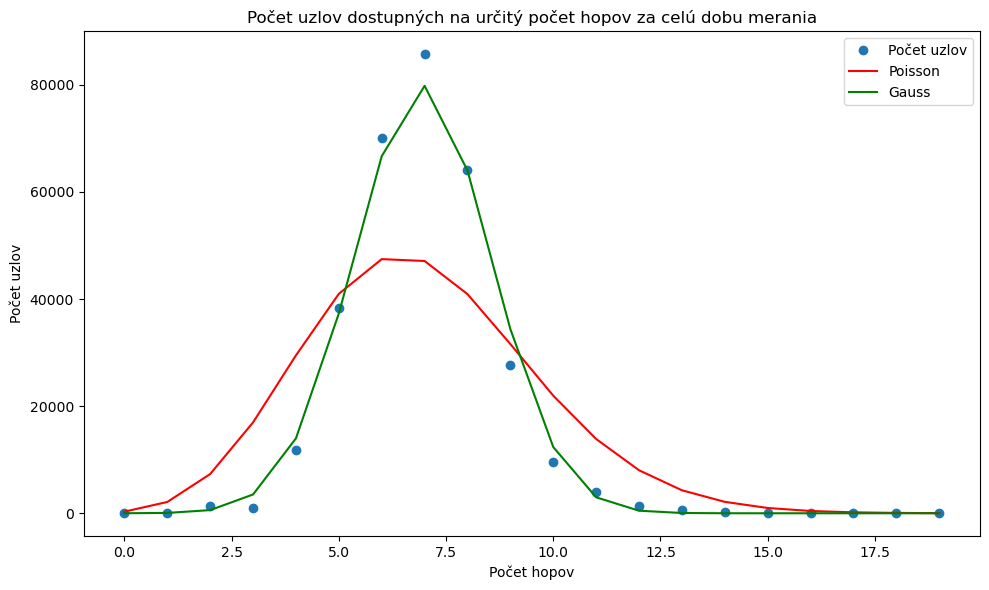

    distance  count  percentage  cumulative_count  cumulative_percentage  \
0          0      1    0.000316                 1               0.000316   
1          1     60    0.018976                61               0.019292   
2          2   1389    0.439294              1450               0.458586   
3          3   1044    0.330182              2494               0.788769   
4          4  11876    3.755981             14370               4.544750   
5          5  38329   12.122180             52699              16.666930   
6          6  70101   22.170600            122800              38.837531   
7          7  85698   27.103410            208498              65.940940   
8          8  64088   20.268890            272586              86.209830   
9          9  27665    8.749514            300251              94.959344   
10        10   9564    3.024773            309815              97.984117   
11        11   4008    1.267596            313823              99.251713   
12        12

In [4]:
# Entire data range
from ip_analysis_tool.enums import TimeInterval
data = accessibility_within_hops(get_graph_by_date(time_interval=TimeInterval.ALL))
data, poisson_lambda, poisson_std = poisson_fit(data, x_characteristic="distance", y_characteristic="count")
data, gauss_lambda, gauss_std = gaussian_fit(data, x_characteristic="distance",y_characteristic="count")
data.to_csv("scratchpad/accessibility_within_hops_all.csv", index=False)
print("Poisson lambda: " + str(poisson_lambda) + ", Poisson std: " + str(poisson_std) + ", Poisson chi: " + str(chi_2(data, "count", "poisson_fit")))
print("Gaussian lambda: " + str(gauss_lambda) + ", Gaussian std: " + str(gauss_std) + ", Gaussian chi: " + str(chi_2(data, "count", "gaussian_fit")))
visualize_chart_add_dual_line(
    data=data,
    x_characteristic="distance",
    y_characteristic="count",
    y_line_characteristic="poisson_fit",
    y_2_line_characteristic="gaussian_fit",
    title="Počet uzlov dostupných na určitý počet hopov za celú dobu merania",
    x_label="Počet hopov",
    y_label="Počet uzlov",
    y_line_label="Poisson",
    y_2_line_label="Gauss"
)
print(data)